# Exploration of the Dynamic Solow Model

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [3]:
from solowModel import SolowModel

In [4]:
from ornstein_uhlenbeck import OrnsteinUhlenbeck

### Setting initial Parameters

In [5]:
# Separate parameters
np.random.seed(42)
t0 = 1
t_end = 1e4

In [15]:
# Characteristic timescales tau_h << tau_s << tau_y << 1/epsilon
tau_h =  1 / 0.04
tau_s =  1 / 0.004
tau_y =  1 / 0.0005
tech_rate = 0.00005
pop_growth = np.log(1.005) / 365 # USA is about 0.5% per year

In [7]:
# Household
hh_kwargs = {'savings_rate': 0.3, 'static': True}

In [8]:
# Firms
firm_kwargs = {'prod_func': 'cobb-douglas', 'parameters': {'rho': 1 / 3, 'tau_y': tau_y}}

In [9]:
# Capital Markets
capital_kwargs = {
    'static': False, 'depreciation': 0.2, 'pop_growth': pop_growth,
    'dynamic_kwargs': {
        'tau_s': tau_s, 'beta1': 1.1, 'beta2': 1.0, 
        'tau_h': tau_h, 'gamma': 2000, 
        'c1': 1, 'c2': 0.00015, 'c3': 0,
        }
    }   

In [10]:
# News Process
ou_kwargs = {'decay': 0.2, 'drift': 0, 'diffusion': 2.5, 't0': t0}

### Solow Model

In [16]:
# production, ks, kd, sentiment, information, tech, excess, consumption
initial_values = [1, 1, 1, 0, 0, 1, 0.7]

sm = SolowModel(hh_kwargs=hh_kwargs,
                   firm_kwargs=firm_kwargs,
                   capital_kwargs=capital_kwargs,
                   tech_rate=tech_rate,
                   ou_kwargs=ou_kwargs)

path = sm.solve(initial_values,model='draft',t0=t0,t_end=t_end)

/Users/karlnaumann/Library/Mobile Documents/com~apple~CloudDocs/Econophysics/InteractionEconomics/solow/firm.py:81: RuntimeWarning: invalid value encountered in double_scalars
  return tech * (k ** rho) * (n ** (1 - rho))


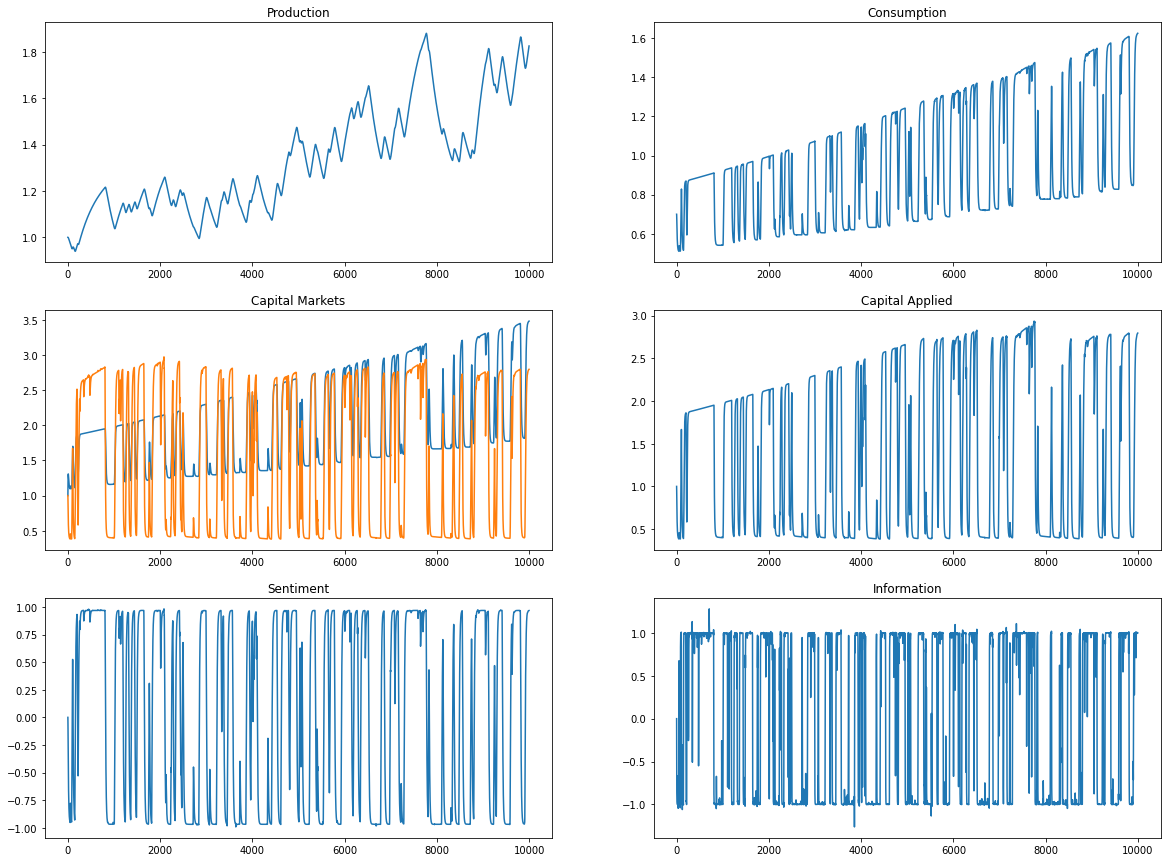

In [17]:
sm.visualise()

In [18]:
# production, ks, kd, sentiment, information, tech, excess
initial_values = [1, 1, 1, 0, 0, 1, 0, 0.7]

sm_e = SolowModel(hh_kwargs=hh_kwargs,
                   firm_kwargs=firm_kwargs,
                   capital_kwargs=capital_kwargs,
                   tech_rate=tech_rate,
                   ou_kwargs=ou_kwargs)

path = sm_e.solve(initial_values,model='excess',t0=t0,t_end=t_end)

/Users/karlnaumann/Library/Mobile Documents/com~apple~CloudDocs/Econophysics/InteractionEconomics/solow/firm.py:81: RuntimeWarning: invalid value encountered in double_scalars
  return tech * (k ** rho) * (n ** (1 - rho))


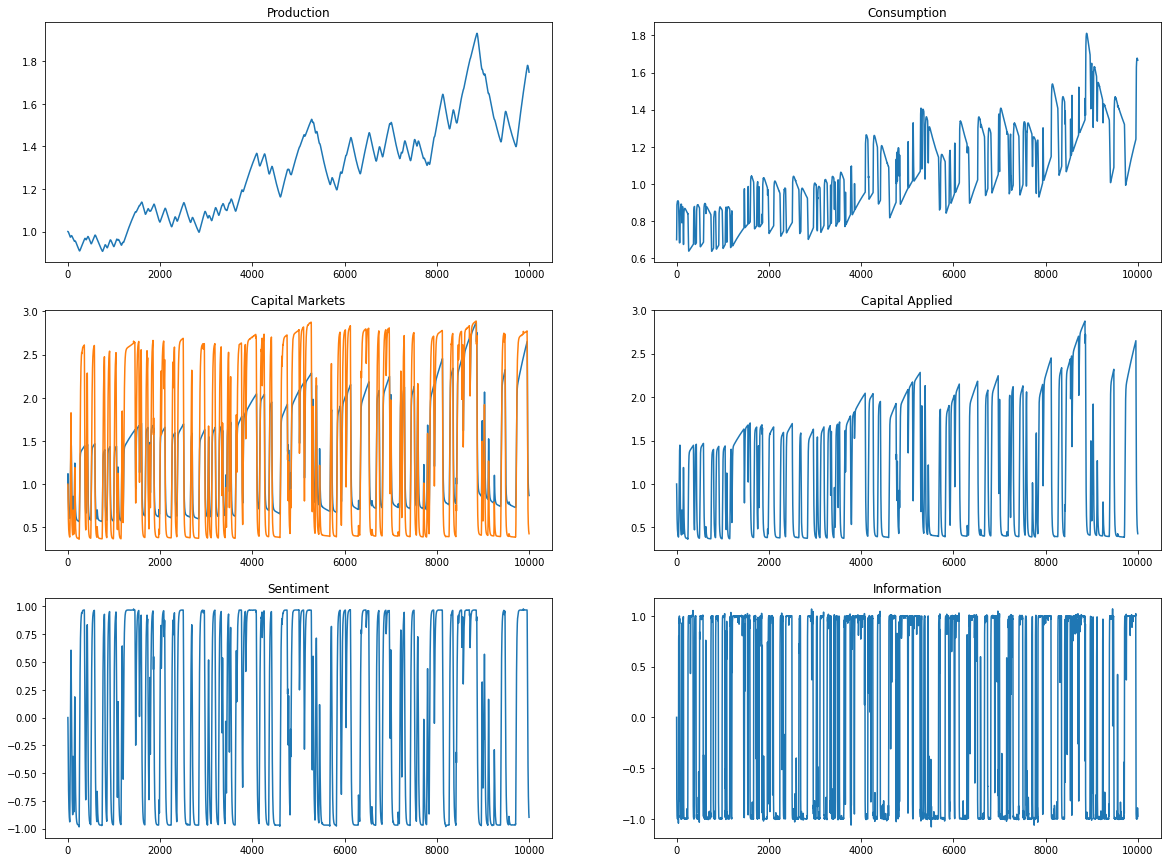

In [19]:
sm_e.visualise()

In [20]:
y = sm_e.path.y[0,:]
c = sm_e.path.y[-1,:]

In [21]:
np.sum(y - c < 0)

0